# **Data for English**

In [0]:
data_urls = ["""https://cl.lingfil.uu.se/~frewa417/english_past_tense.arff""", """https://cl.lingfil.uu.se/~frewa417/german_plural.arff"""]

filenames = [url.split("/")[-1] for url in data_urls]

import urllib.request
for url, fn in zip(data_urls, filenames):
  urllib.request.urlretrieve(url, fn)

In [0]:
from scipy.io.arff import loadarff
loaded_data_files = [loadarff(fn) for fn in filenames]

In [0]:
import numpy as np

D = dict()
for data in loaded_data_files:
  data_points = data[0]
  field_names = data[1].names()
  assert field_names[0] == 'frequency'
  assert field_names[-1] == 'class'
  X = list()
  y = list()
  for point in data_points:
    v = [field_names[i]+"_"+point[i].decode("utf-8") for i in range(1, len(point)-1)]
    X.extend([v]*int(point[0]))
    assert len(v) == len(X[0])
    u = [point[-1].decode("utf-8")]
    y.extend([u]*int(point[0]))
    assert len(u) == len(y[0])
  assert len(X) == np.sum(np.asarray([point[0] for point in data_points]))
  X_orig = np.asarray(X)
  y_orig = np.asarray(y).ravel()
  D[data[1].name] = tuple([X_orig, y_orig])

The following code makes the categorical features into a numeric array. 

From here forward, the English data will use the variables X and y, while the German data will use G and h.

In [0]:
X, y = D['past-tense']

from sklearn.preprocessing import OneHotEncoder
feature_encoder = OneHotEncoder()
X = feature_encoder.fit_transform(X)
names = feature_encoder.get_feature_names()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

print("X:", X.shape, ", y:", y.shape)

X: (3966109, 371) , y: (3966109,)


In [0]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=18, ccp_alpha=0.002)
classifier.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
from sklearn.model_selection import KFold

for train, test in KFold(n_splits=5, shuffle=True).split(X):
  X_train = X[train]
  X_test = X[test]
  y_train = y[train]
  y_test = y[test]
  classifier.fit(X_train, y_train)
  print("Testing Accuracy: %.1f%%" %(100*classifier.score(X_test, y_test)))
  print("Training Accuracy: %.1f%%" % (100*classifier.score(X_train, y_train)))


Testing Accuracy: 94.5%
Training Accuracy: 94.5%
Testing Accuracy: 94.5%
Training Accuracy: 94.5%
Testing Accuracy: 94.6%
Training Accuracy: 94.7%
Testing Accuracy: 94.7%
Training Accuracy: 94.7%
Testing Accuracy: 94.7%
Training Accuracy: 94.7%


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .9)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, classifier.predict(X_test)))

print(classification_report(y_test, classifier.predict(X_test)))


[[     0      0      0 ...      0      0    242]
 [     0    657      0 ...      0      0     31]
 [     0      0      0 ...      0      0     28]
 ...
 [     0      0      0 ...      0      0    312]
 [     0      0      0 ...      0      0    137]
 [     0      7      0 ...      0      0 122526]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       242
           1       0.99      0.73      0.84       901
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00       891
           4       0.00      0.00      0.00         1
           5       0.89      0.96      0.92       816
           6       1.00      1.00      1.00      3730
           7       0.99      0.58      0.73      1038
           8       0.98      0.54      0.70      5422
           9       0.00      0.00      0.00         2
          10       1.00      0.94      0.97      4613
          11       0.00      0.00      0.00       794
          12       0.96      0.77      0.86      2992
          13       0.95      0.98      0.97      1963
          14       0.00      0.00      0.00       902
          15       1.00      0.98      0.99      2369
          16       0.00      0.00      0.00       400
          17       0.00    

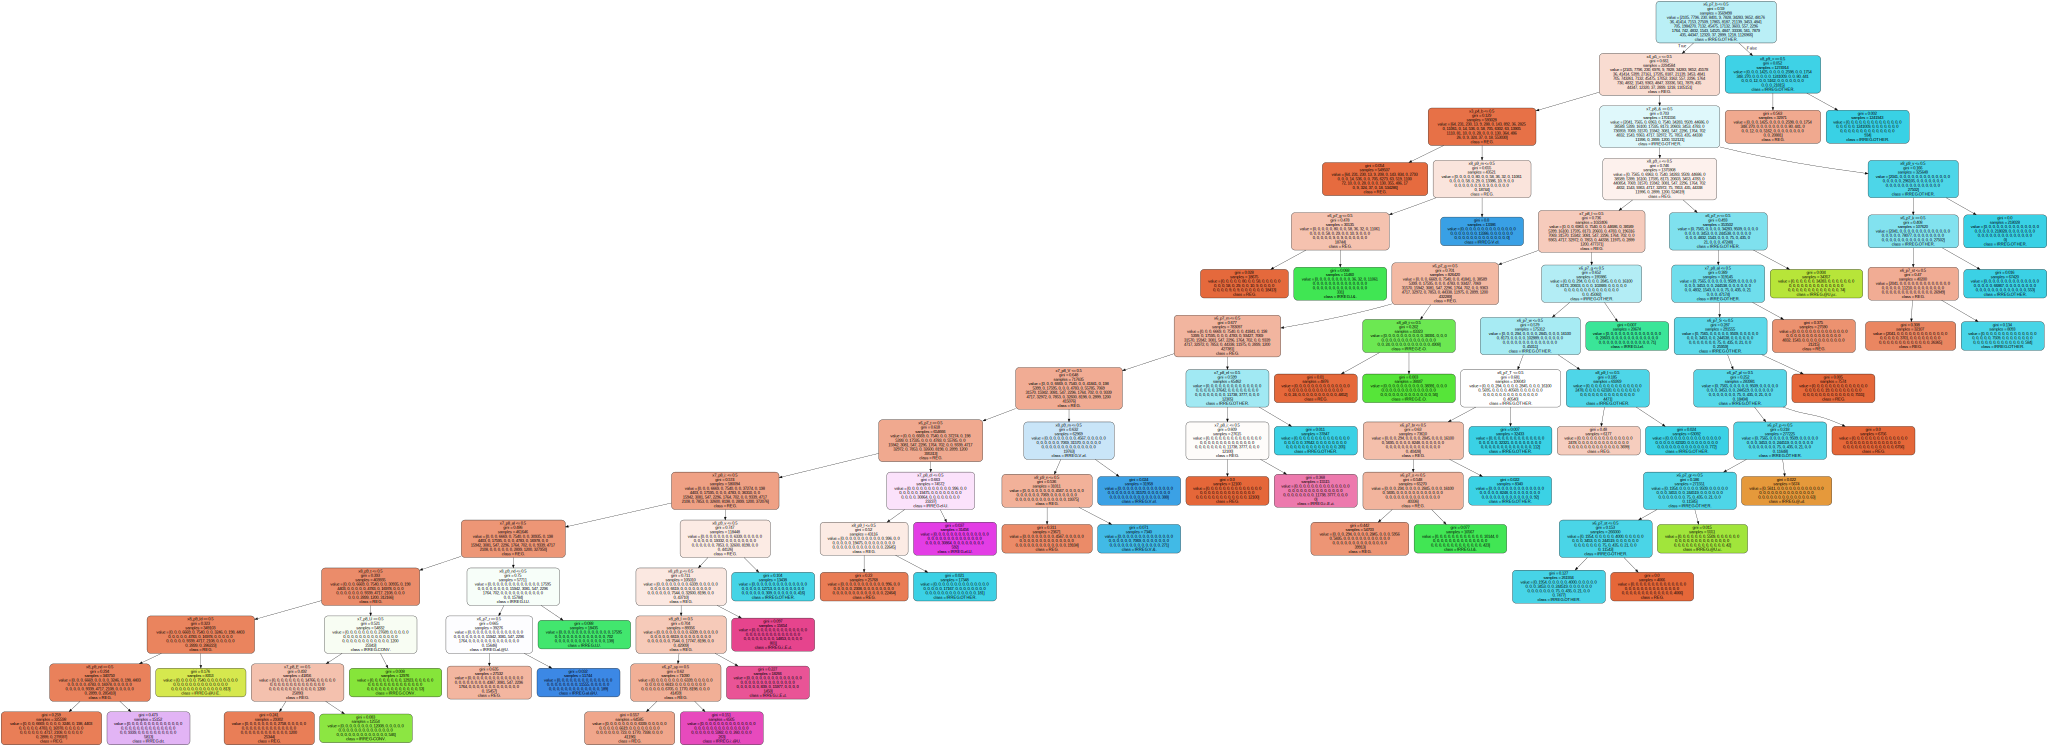

In [0]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(classifier, out_file=None, feature_names=names,
                           class_names=label_encoder.classes_, filled=True,
                           rounded=True, special_characters=False)
graph = graphviz.Source(dot_data)
graph


# **Data for German**

In [0]:
G, h = D['plural']

from sklearn.preprocessing import OneHotEncoder
feature_encoder = OneHotEncoder()
G = feature_encoder.fit_transform(G)
names_2 = feature_encoder.get_feature_names()

from sklearn.preprocessing import LabelEncoder
label_encoder_2 = LabelEncoder()
h = label_encoder_2.fit_transform(h)

print("G: ", G.shape, ", h:", h.shape)

G:  (980184, 371) , h: (980184,)


For the 

In [0]:
from sklearn.tree import DecisionTreeClassifier
german_classifier = DecisionTreeClassifier(max_depth=12, ccp_alpha=0.001)
german_classifier.fit(G, h)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

CCP_Alpha is used for pruning and is a hyperparameter. The larger the alpha, the less accurate the algorithm will be

In [0]:
from sklearn.model_selection import KFold

for train, test in KFold(n_splits=5, shuffle=True).split(G):
  G_train = G[train]
  G_test = G[test]
  h_train = h[train]
  h_test = h[test]
  german_classifier.fit(G_train, h_train)
  print("Testing Accuracy: %.1f%%" %(100*german_classifier.score(G_test, h_test)))
  print("Training Accuracy: %.1f%%" % (100*german_classifier.score(G_train, h_train)))

Testing Accuracy: 90.0%
Training Accuracy: 90.0%
Testing Accuracy: 90.0%
Training Accuracy: 90.0%
Testing Accuracy: 89.9%
Training Accuracy: 90.0%
Testing Accuracy: 90.0%
Training Accuracy: 90.0%
Testing Accuracy: 89.9%
Training Accuracy: 89.9%


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

G_train, G_test, h_train, h_test = train_test_split(G, h, train_size = .9)
german_classifier.fit(G_train, h_train)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(h_test, german_classifier.predict(G_test)))

print(classification_report(h_test, german_classifier.predict(G_test)))

[[10524    99     4    15   408   234     0   124]
 [  440   385     0     0     0    71     0     0]
 [    0     0  7090     9  2318   297    12     0]
 [    0     0    75  2560   783    46     1    15]
 [   49     0   563   277 21991    66    13   106]
 [  180    15   329    15  1919 41784     0    60]
 [   22     0     0     0   384     0  1011     0]
 [   59     2   169    15   535   191     0  2754]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11408
           1       0.77      0.43      0.55       896
           2       0.86      0.73      0.79      9726
           3       0.89      0.74      0.80      3480
           4       0.78      0.95      0.86     23065
           5       0.98      0.94      0.96     44302
           6       0.97      0.71      0.82      1417
           7       0.90      0.74      0.81      3725

    accuracy                           0.90     98019
   macro avg       0.88      0.77      0.82     9

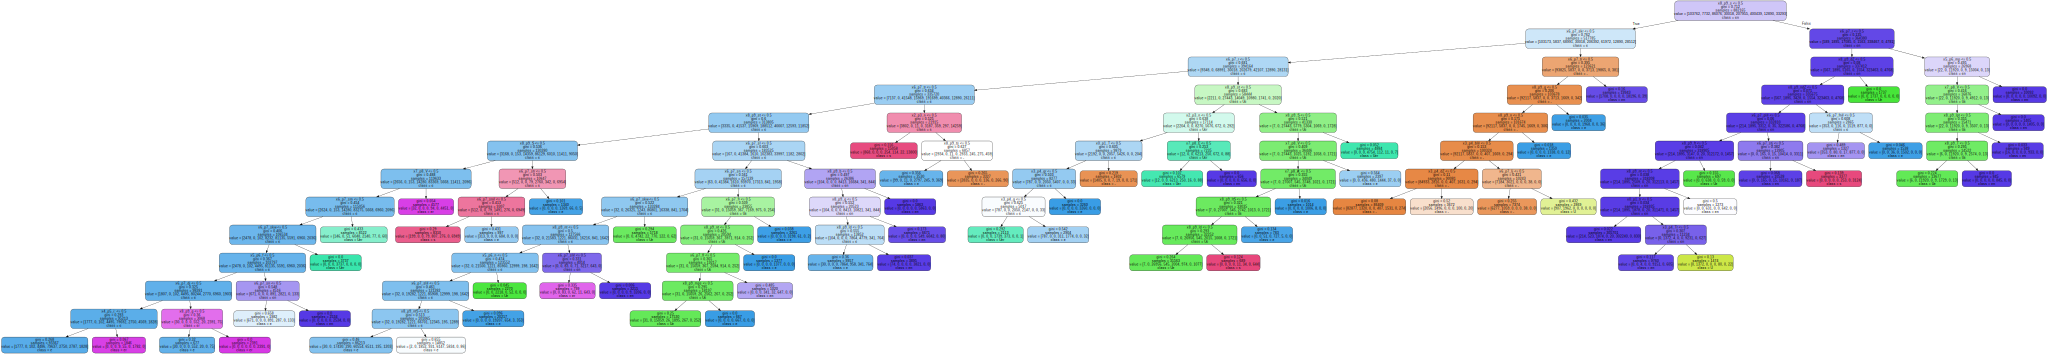

In [0]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(german_classifier, out_file=None, feature_names=names,
                           class_names=label_encoder_2.classes_, filled=True,
                           rounded=True, special_characters=False)
graph = graphviz.Source(dot_data)
graph

# **Report**

1. At the start of the lab, the original accuracy for solely the English past-tense was about 70%. We are able to change the accuracy by changing the Max Depth of the decision tree code. If we replace the max depth with "None", i.e. having an endless tree, then the accuracy will increase to almost perfection. However, this will overfit the model thus rendering itself pointless as it will not be able generalize on new data. If we decrease the max depth, then this will lower the accuracy and allow the model to not be overfitted. Reviewing the precision and recall for the English past tense, some of the classes had 0 and others had 1. This is so because the machine could have removed some classes thus resulting a recall or precision percent of zero. When I changed the cc_alpha to 0.25, it only gave a tree with only one feature and no branches with a 55.6% accuracy. This also produced a confusion matrix with all zeros. Realizing that alpha should be really small, I changed it to 0.002, which produced a testing accuracy of 94.5%. These numbers were chosen  randomly. 

2. For both the English and the German data, the training error and test error are equal.

3. I understand how the decision trees work for both the German and the English data. For the German data, it begins with whether the noun is female or not. Afterwards, it goes down the list of the possible phonetic penultime endings deciding whether the word has it or not, then giving it a possible ending. As for the English, it is roughly the same. The algorithm decides from either the antepenultimate, penultimate, or ultimate syllable the correct verb ending that particular word has. 

# **K-Nearest Neighbor**

## **English Data**

In [0]:
I = np.random.uniform(0, 1, size=X.shape[0]) < .05
X = X[I, :]
y = y[I]

print("X:", X.shape, ", y:", y.shape)

X: (1991, 371) , y: (1991,)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9)

knn.fit(X_train, y_train)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, knn.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.        , 1.        , 1.        , 0.28571429, 1.        ,
        1.        , 0.        , 0.94957983, 1.        , 0.        ,
        0.        , 0.75      , 1.        , 0.        , 1.        ]),
 array([0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.86764706]),
 array([0.        , 1.        , 1.        , 0.44444444, 1.        ,
        1.        , 0.        , 0.97413793, 1.        , 0.        ,
        0.        , 0.85714286, 1.        , 0.        , 0.92913386]),
 array([  1,   1,   1,   2,   2,   3,   1, 113,   1,   1,   0,   3,   1,
          2,  68]))

In [19]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn_cv, X, y, cv=5)

print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))


[0.79197995 0.8718593  0.80653266 0.72613065 0.42462312]
cv_scores mean:0.7242251357035805


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


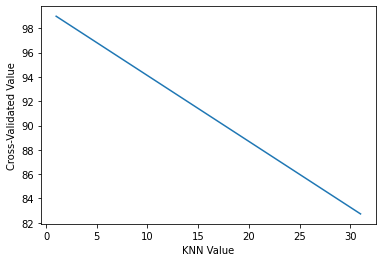

In [20]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9)

k_scores = []
k_range = [1, 31]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores = 100*knn.score(X, y)
  k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel("KNN Value")
plt.ylabel("Cross-Validated Value")
plt.show()

## **German Data**

In [22]:
I_2= np.random.uniform(0, 1, size=G.shape[0]) < .05
G = G[I_2, :]
h = h[I_2]

print("G:", G.shape, ", h:", h.shape)

G: (4901, 371) , h: (4901,)


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn_ger = KNeighborsClassifier(n_neighbors=5)

from sklearn.model_selection import train_test_split
G_train, G_test, h_train, h_test = train_test_split(G, h, train_size=.9)

knn.fit(G_train, h_train)

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(h_test, knn.predict(G_test))

(array([0.87878788, 1.        , 0.73684211, 0.52631579, 0.76576577,
        0.93617021, 0.6       , 0.81818182]),
 array([0.86567164, 0.2       , 0.71794872, 0.83333333, 0.84158416,
        0.93617021, 0.42857143, 0.5       ]),
 array([0.87218045, 0.33333333, 0.72727273, 0.64516129, 0.80188679,
        0.93617021, 0.5       , 0.62068966]),
 array([ 67,   5,  39,  12, 101, 235,  14,  18]))

In [25]:
from sklearn.model_selection import cross_val_score
import numpy as np

knn_cv_ger = KNeighborsClassifier(n_neighbors=5)

cv_scores_ger = cross_val_score(knn_cv, G, h, cv=5)

print(cv_scores_ger)
print("cv_scores mean:{}".format(np.mean(cv_scores_ger)))


[0.73598369 0.78265306 0.78877551 0.7744898  0.71122449]
cv_scores mean:0.7586253094509976


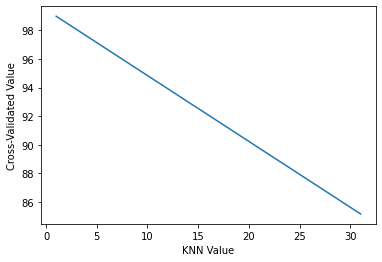

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

G_train, G_test, h_train, h_test = train_test_split(G, h, train_size=.9)

kk_scores = []
kk_range = [1, 31]
for kk in kk_range:
  knn_ger = KNeighborsClassifier(n_neighbors = kk)
  knn_ger.fit(G_train, h_train)
  scores_ger = 100*knn_ger.score(G, h)
  kk_scores.append(scores_ger.mean())

plt.plot(kk_range, kk_scores)
plt.xlabel("KNN Value")
plt.ylabel("Cross-Validated Value")
plt.show()

# **Report**
When using the original K of 3, the accuracy was about 79%. I increased the amount to 5 and the accuracy decreased to 72%.

The code below prints out the average accuracy after cross-validation is performed along with the some minor warnings.

I read online from https://www3.nd.edu/~steve/computing_with_data/17_Refining_kNN/refining_knn.html that the best K should be the square root of the number in the training data, which came to be about 59. It does take some time to load, so I changed it back to 5. 

When I tried graphing, I had originally tried using the original cross-validation code that I used in cells 103 and 64, but I kept getting an error. I ended up just using the "score" method. As seen in the English and German KNN graph, I got a linear line decreasing as the k parameter was changed.

I know that k is a hyperparameter that can be manipulated to obtain a better accuracy. From online searching, we can use weighted k values to help compensate for uninformative features. Then you will need to use the weighted Euclidean distance.

According to the text, deciding which model is better, either KNN or decision tree, depends on the type of data that needs to be predicted. If we set an accurate k, then the KNN model will work better than the decision tree.

The most important features are whether the noun is male or female for the German data and for the English is whether the last phonetic syllable ends in a b or not. 



